# MNIST Digits Classification using Neural Networks



Mount your drive in order to run locally with colab

In [79]:
# from google.colab import drive
# drive.mount('/content/gdrive')

download & load the MNIST dataset.

*just run the next two cells and observe the outputs (shift&enter) 

the training data set contains 60000 samples
each sample image from the training data set is a column-stacked grayscale image of 784 pixels
 this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)
these column-stacked images can be reshaped to an image of (28, 28) pixels


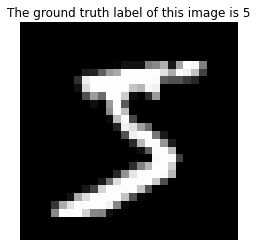

In [80]:

#importing modules that will be in use
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle
from PIL import Image
import random
import numpy as np

def _download(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_name)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path =  os.path.join(dataset_dir, file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = ''
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)


# printing data shape

print('the training data set contains '+ str(x_train.shape[0]) + ' samples')

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
print('each sample image from the training data set is a column-stacked grayscale image of '+ str(x_train.shape[1]) +' pixels'
      + '\n this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)' )
print('these column-stacked images can be reshaped to an image of ' +str(img.shape)+ ' pixels')

# printing a sample from the dataset

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('The ground truth label of this image is '+str(label))
plt.show()

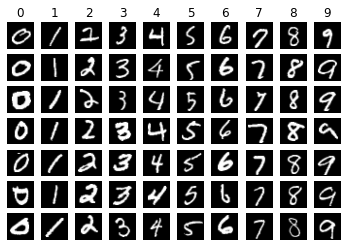

In [81]:
# Visualize some examples from the dataset.
# We'll show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7
for cls in range(num_classes):
    idxs = np.argwhere(t_train==cls)
    sample = np.random.choice(idxs.shape[0], samples_per_class, replace=False) # randomly picks 7 from the appearences 
    idxs=idxs[sample]

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = x_train[idx].reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**QUESTION 1**:What are vanishing gradients? Name one known activation function that has this problem and one that does not.

**ANSWER**:
vanishing gradients are a problem of when the partial derivitives of backpropogation are so small compared to the weights that they stop effecting the weights thus stopping the network from training
An example of an activation function that has this problem is the sigmoid function where the gradients decrease exponentially between layers.
An example of an activation function that does not have this problem is Growing Cosine Unit (GCU).

here we will implement the sigmoid activation function and it's gradient 

In [82]:
def sigmoid(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig = 1 / (1 + np.exp(-x))

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig

def sigmoid_grad(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig_grad = sigmoid(x) * (1 - sigmoid(x))

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig_grad


Implement a fully-vectorized loss function for the Softmax classifier
Make sure the softmax is stable.
To make our softmax function numerically stable,we simply normalize the values in the vector, 
by multiplying the numerator and denominator with a constant C.
We can choose an arbitrary value for log(C) term, but generally log(C)=−max(a) is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity.

In [83]:
def softmax(x):
    """
  Softmax loss function, should be implemented in a vectorized fashion (without loops)


  Inputs:
  - X: A numpy array of shape (N, C) containing a minibatch of data.
  Returns:
  - probabilities: A numpy array of shape (N, C) containing the softmax probabilities.

  if you are not careful here, it is easy to run into numeric instability
     """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################

    e_x = np.exp(x.T - np.max(x, axis=1)).T
    probabilities = e_x / np.tile(np.sum(e_x, axis=1),(10,1)).T
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return probabilities

def cross_entropy_error(y, t):
    """
    Inputs:

    - t:  A numpy array of shape (N,C) containing  a minibatch of training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: A numpy array of shape (N, C) containing the softmax probabilities (the NN's output).

    Returns a tuple of:
    - loss as single float (do not forget to divide by the number of samples in the minibatch (N))
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################

    error = -np.log(np.mean(y[t.astype(bool)]))

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return error

We will design and train a two-layer fully-connected neural network with sigmoid nonlinearity and
softmax cross entropy loss. We assume an input dimension of D=784, a hidden dimension of H, and perform classification over C classes.

The architecture should be fullyconnected -> sigmoid -> fullyconnected -> softmax.

The learnable parameters of the model are stored in the dictionary,
'params', that maps parameter names to numpy arrays.

In the next cell we will initialize the weights and biases, design the fully connected(fc) forward and backward functions that will be in use for the training (using SGD).



In [84]:
def TwoLayerNet(input_size, hidden_size, output_size, weight_init_std=0.01):
    ############################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights    #
    # should be initialized from a Gaussian with standard deviation equal to   #
    # weight_init_std, and biases should be initialized to zero. All weights and  #
    # biases should be stored in the dictionary 'params', with first layer  #
    # weights and biases using the keys 'W1' and 'b1' and second layer weights #
    # and biases using the keys 'W2' and 'b2'.                                 #
    ############################################################################
    params = {"W1": np.random.normal(loc=0, scale=weight_init_std, size=(input_size,hidden_size)),
              "b1": np.zeros(hidden_size),
              "W2": np.random.normal(loc=0, scale=weight_init_std, size=(hidden_size,output_size) ),
              "b2": np.zeros(output_size)}
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return params


def FC_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    The input x has shape (N, D) and contains a minibatch of N
    examples, where each example x[i] has shape D and will be transformed to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output result of the forward pass, of shape (N, M)
    - cache: (x, w, b)
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    out = np.matmul(x, w) + b
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache


def FC_backward(dout, cache):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - w: Weights, of shape (D, M)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, D)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    dw = np.matmul(x.T, dout)
    dx = np.matmul(dout, w.T)
    db = np.sum(dout, axis=0)

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db

Here we will design the entire model, which outputs the NN's probabilities and gradients.


In [85]:
def Model(params, x, t):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - params:  dictionary with first layer weights and biases using the keys 'W1' and 'b1' and second layer weights
    and biases using the keys 'W2' and 'b2'. each with dimensions corresponding its input and output dimensions.
    - x: Input data, of shape (N,D)
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    Returns:
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    - grads: dictionary containing gradients of the loss with respect to W1, W2, b1, b2.

    note: use the FC_forward ,FC_backward functions.

    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    # batch_num = x.shape[0]

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # forward (fullyconnected -> sigmoid -> fullyconnected -> softmax).

    # took some denotations from "Computing Neural Network Gradients" by Kevin Clark
    z, cache1 = FC_forward(x, W1, b1)
    h = sigmoid(z)
    teta, cache2 = FC_forward(h, W2, b2)
    y = softmax(teta)

    # backward - calculate gradients.
    # J is cost function
    djy = (y-t)
    djdteta = djy*y*(1-y)
    djdh, djdw2, djdb2 = FC_backward(djdteta, cache2)
    djdz = np.multiply(djdh,sigmoid_grad(z))
    djdx, djdw1, djdb1 = FC_backward(djdz, cache1)
    grads = {'W1': djdw1 ,'W2': djdw2, 'b1': djdb1 ,'b2': djdb2 }

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

    return grads, y

Compute the accuracy of the NNs predictions.


In [86]:
def accuracy(y, t):
    """
    Computes the accuracy of the NN's predictions.
    Inputs:
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    Returns:
    - accuracy: a single float of the average accuracy.
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    z = np.mean(np.equal(np.argmax(y,axis = 1) , np.argmax(t,axis=1))) * 100

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return z

Trianing the model:
To train our network we will use minibatch SGD.  
*Note that the test dataset is actually used as the validation dataset in the training

training of 13 epochs, each epoch will have 1500 iterations
train acc: 81.50% |  test acc: 92.34% |  loss for epoch 0: 0.4066876851254466
train acc: 93.54% |  test acc: 94.13% |  loss for epoch 1: 0.12661080068900085
train acc: 94.91% |  test acc: 95.28999999999999% |  loss for epoch 2: 0.10209337623593401
train acc: 95.98% |  test acc: 95.84% |  loss for epoch 3: 0.08341620287993788
train acc: 96.57% |  test acc: 96.31% |  loss for epoch 4: 0.07288398530180473
train acc: 97.03% |  test acc: 96.5% |  loss for epoch 5: 0.06434924461900497
train acc: 97.28% |  test acc: 96.67% |  loss for epoch 6: 0.06039147927140085
train acc: 97.59% |  test acc: 96.57% |  loss for epoch 7: 0.05448216288649271
train acc: 97.76% |  test acc: 96.78% |  loss for epoch 8: 0.05054676051188908
train acc: 98.02% |  test acc: 97.13000000000001% |  loss for epoch 9: 0.04648601132798501
train acc: 98.04% |  test acc: 97.15% |  loss for epoch 10: 0.045125922375798
train acc: 98.23% |  test acc: 96.96000000000001% 

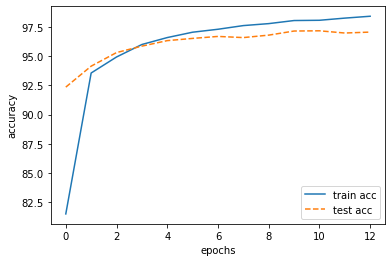

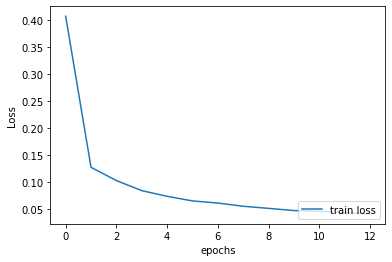

In [87]:
# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.

epochs =13
mini_batch_size =40
learning_rate = 0.06
num_hidden_cells =100


def Train(epochs_num, batch_size, lr, H):
    #  Dividing a dataset into training data and test data

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    C = 10
    D = x_train.shape[1]
    network_params = TwoLayerNet(input_size=D, hidden_size=H,
                                 output_size=C)  # hidden_size is the only hyperparameter here

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)

    print('training of ' + str(epochs_num) + ' epochs, each epoch will have ' + str(iter_per_epoch) + ' iterations')
    for i in range(epochs_num):

        train_loss_iter = []
        train_acc_iter = []

        for k in range(iter_per_epoch):

            #############################################################################
            #                             YOUR CODE                                     #
            #############################################################################
            # 1. Select part of training data (mini-batch) randomly

            shuffle = random.sample(range(x_train.shape[0]), mini_batch_size)
            minibatch = x_train[shuffle, :]
            t_batch = t_train[shuffle, :]
            # 2. Calculate the predictions and the gradients to reduce the value of the loss function
            grads, y_batch = Model(network_params, minibatch, t_batch)
            # 3. Update weights and biases with the gradients
            network_params["W1"] = network_params["W1"] - lr * grads["W1"]
            network_params["W2"] = network_params["W2"] - lr * grads["W2"]
            network_params["b1"] = network_params["b1"] - lr * grads["b1"]
            network_params["b2"] = network_params["b2"] - lr * grads["b2"]
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Calculate the loss and accuracy for visalizaton

            error = cross_entropy_error(y_batch, t_batch)
            train_loss_iter.append(error)
            acc_iter = accuracy(y_batch, t_batch)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch - 1:
                train_acc = np.mean(train_acc_iter)
                train_acc_list.append(train_acc)
                train_loss_list.append(np.mean(train_loss_iter))

                _, y_test = Model(network_params, x_test, t_test)
                test_acc = accuracy(y_test, t_test)
                test_acc_list.append(test_acc)
                print("train acc: " + str(train_acc)[:5] + "% |  test acc: " + str(
                    test_acc) + "% |  loss for epoch " + str(i) + ": " + str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list, network_params

train_acc, test_acc, train_loss, net_params = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()

# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.


**QUESTION 2:** Explain the results looking at the visualizations above, base your answer on the hyperparameters.

**ANSWER:**
We can see a very large increase in accuracy and large decreace in loss function on the first epoch because we are entering a local minimum ,comparing to the random weighs and zero bias we started with a single linear decent iteration would have much better performance.
After the first epoch we see a slow increase in training accuracy in the pursuit of a minimum loss with the backprop within this local minimum. we also see fluctuating increase in test accuracy due to lack of correlation between the sets.
the gradient of this accuracy increase is  dependent on the learning rate (as is the first epoch increase), theoretically we can improve the gradient of the increace with a higher learning rate but if we use too high of a learning rate we might miss the local minimum we aspire to.



**QUESTION** 3: Suggest a way to improve the results by changing the networks's architecture  

**ANSWER**:
I would suggest adding more layers to the network to improve the results because this network only has one hidden layer. adding to many layers will increase the chance of over-fit, so we can add a single hidden layer to help differentiate more subtle features between digits.
we can also transfer the pixel space input to feature space input with CNN.



(784, 100)


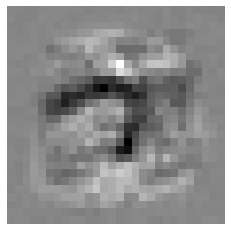

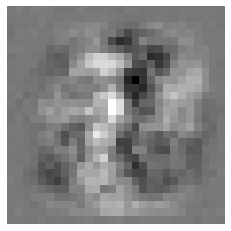

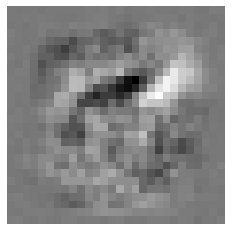

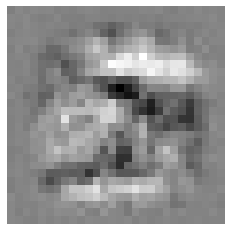

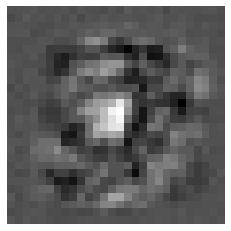

In [88]:
# Visualize some weights. features of digits should be somehow present.
def show_net_weights(params):
    W1 = params['W1']
    print(W1.shape)
    for i in range(5):
        W = W1[:,i*5].reshape(28, 28)
        plt.imshow(W,cmap='gray')
        plt.axis('off')
        plt.show()

show_net_weights(net_params)


Implement, train and test the same two-layer network, using a **deep learning library** (pytorch/tensorflow/keras).

As before, you should be able to receive at least 97% accuracy.

Please note, that in this section you will need to implement the model, the training and the testing by yourself (you may use the code in earlier sections)
Don't forget to print the accuracy during training (in the same format as before).

For installing a deep learning library, you should use "!pip3 install..." (lookup the compatible syntex for your library)

training of 13 epochs, each epoch will have 1500 iterations
train acc: 87.84% |  test acc: 92.62% |  loss for epoch 0: 0.4506585094134013
train acc: 93.28% |  test acc: 94.33% |  loss for epoch 1: 0.23655528170863788
train acc: 94.82% |  test acc: 95.43% |  loss for epoch 2: 0.17984816825389863
train acc: 95.82% |  test acc: 96.11% |  loss for epoch 3: 0.14499794211176534
train acc: 96.48% |  test acc: 96.45% |  loss for epoch 4: 0.12277876212261617
train acc: 96.98% |  test acc: 96.77% |  loss for epoch 5: 0.10618984870240092
train acc: 97.32% |  test acc: 97.04% |  loss for epoch 6: 0.09332700552015255
train acc: 97.60% |  test acc: 97.16% |  loss for epoch 7: 0.08327942554683734
train acc: 97.81% |  test acc: 97.37% |  loss for epoch 8: 0.07489539193579306
train acc: 98.03% |  test acc: 97.58% |  loss for epoch 9: 0.06820035172284891
train acc: 98.23% |  test acc: 97.49% |  loss for epoch 10: 0.06218709163926542
train acc: 98.35% |  test acc: 97.52% |  loss for epoch 11: 0.056917565

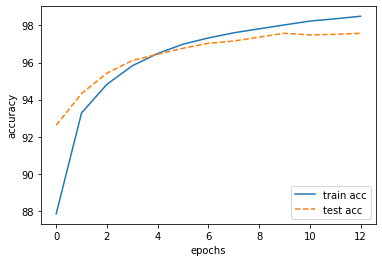

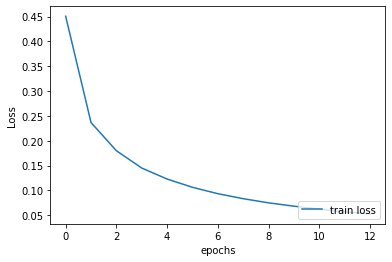

In [89]:
 #############################################################################
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
import numpy as np

class MyNet(nn.Module):
    def __init__(self):
      super(MyNet, self).__init__()
      self.fc1 = nn.Linear(784, num_hidden_cells)
      self.fc2 = nn.Linear(num_hidden_cells, 10)

    # x represents our data
    def forward(self, x):
      # Pass data through fc1 & fc2
      x = self.fc1(x)
      x = F.relu(x)
      out = self.fc2(x)

      return out




def Train(epochs_num, batch_size):
    #  Dividing a dataset into training data and test data
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    tensor_xtrain = torch.Tensor(x_train)
    tensor_ttrain = torch.Tensor(t_train)
    tensor_xtest = torch.Tensor(x_test)
    tensor_ttest = torch.Tensor(t_test)

    train_dataset = TensorDataset(tensor_xtrain,tensor_ttrain)
    test_dataset = TensorDataset(tensor_xtest,tensor_ttest)

    training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=mini_batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=x_test.shape[0], shuffle=False)
    model = MyNet().to(device)
    loss_fn = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0)

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)

    print('training of ' + str(epochs_num) + ' epochs, each epoch will have ' + str(iter_per_epoch) + ' iterations')
    for i in range(epochs_num):

        train_loss_iter = []
        train_acc_iter = []
        for k, data in enumerate(training_loader):
            model.train()
            # Every data instance is an input + label pair
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero your gradients for every batch!
            optimizer.zero_grad()

            # Make predictions for this batch
            outputs = model(inputs)

            # Compute the loss and its gradients
            loss = loss_fn(outputs, labels)
            loss.backward()
            # Adjust learning weights
            optimizer.step()
            correct_labeled_samples = (outputs.argmax(1) == labels.argmax(1)).type(torch.float).sum().item()

            acc_iter = 100 * (correct_labeled_samples / training_loader.batch_size)
            error = loss.item()
            train_loss_iter.append(error)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch - 1:
                with torch.no_grad():
                    model.eval()
                    train_acc = np.mean(train_acc_iter)
                    train_acc_list.append(train_acc)
                    train_loss_list.append(np.mean(train_loss_iter))
                    for i_test, data_test in enumerate(test_loader):
                        input_test , label_test = data_test
                        input_test, label_test = input_test.to(device) , label_test.to(device)
                        y_test = model(input_test)

                    correct_labeled_samples = (y_test.argmax(1) == label_test.argmax(1)).type(torch.float).sum().item()
                    test_acc = 100 * (correct_labeled_samples / test_loader.batch_size)

                    test_acc_list.append(test_acc)
                    print("train acc: " + str(train_acc)[:5] + "% |  test acc: " + str(
                        test_acc) + "% |  loss for epoch " + str(i) + ": " + str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list

train_acc, test_acc, train_loss = Train(epochs, mini_batch_size)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()